In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

conn = sqlite3.connect('champions.db')
cursor = conn.cursor()
df = pd.read_sql_query("SELECT * FROM top", conn)

print(df)

    id          name  tier  winrate  pickrate  banrate  \
0    1        Aatrox     1     49.6      13.8     35.9   
1    2         Akali     5     45.8       2.7      3.6   
2    3        Akshan     4     50.9       1.0      1.3   
3    4       Camille     1     50.7       7.2      3.1   
4    5      Cho'Gath     4     50.5       1.2      0.2   
5    6        Darius     1     51.3       9.2     27.8   
6    7     Dr. Mundo     3     51.0       1.6      0.4   
7    8         Fiora     1     50.5       8.6     18.3   
8    9     Gangplank     2     49.0       5.9      4.8   
9   10         Garen     1     51.6       5.3      1.9   
10  11          Gnar     4     48.1       2.8      0.5   
11  12        Gragas     4     47.3       2.4      0.2   
12  13          Gwen     3     49.2       2.4      0.7   
13  14  Heimerdinger     4     51.6       0.6      0.5   
14  15        Illaoi     2     51.3       2.7      2.2   
15  16        Irelia     2     50.4       5.0      8.2   
16  17        

### Répartition des taux de victoire des personnages
On voit sur le boxplot suivant que les taux de victoire des personnages gravite beaucoup autour de 50%, quelques valeurs gravitant en dessous, et on peut remarquer une valeur abbérante ayant 44% de taux de victoire, qui est donc très bas.

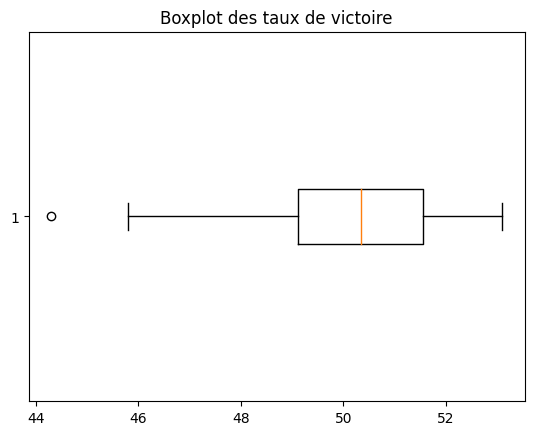

In [11]:
plt.boxplot(df.winrate, showfliers=True, vert=False)
plt.title("Boxplot des taux de victoire")
plt.show()

### Répartition des taux de bannissement des personnages
On voit dans le boxplot suivant que la plupart des taux de bannissement se situent entre 0 et 5%, mais certaines abbérations montennt jusqu'à 35% !

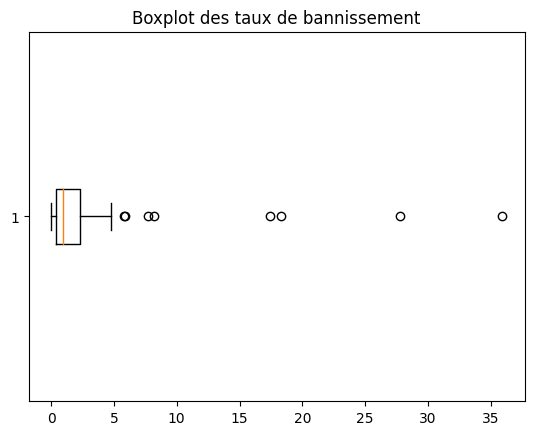

In [10]:
plt.boxplot(df.banrate, showfliers=True, vert=False)
plt.title("Boxplot des taux de bannissement")
plt.show()

### Corrélation entre le taux de bannissement et le taux de victoire d'un personnage
Dans le graphe suivant, on étudie l'évolution du taux de bannissement d'un personnage en fonction de son taux de victoire. Mise à part quelques abbérations, on constate qu'il n'y a pas vraiment de corrélation. Grâce aux informations que l'on a vues dans les boxplots précédents, on voit que notre abbération avec 44% de winrate a également un taux de bannissement assez élevé comparé au reste du cast. Celà peut s'expliquer par le fait que c'est un nouveau personnage et que les gens ne savent pas nécessairement le jouer ou jouer contre.

<AxesSubplot: xlabel='winrate', ylabel='banrate'>

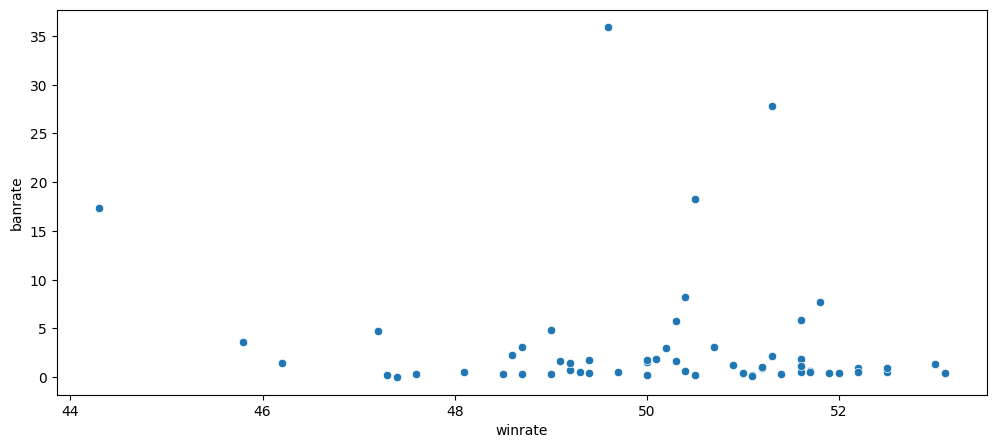

In [38]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = df["winrate"], y = df["banrate"])

### Corrélation entre la popularité d'un champion et son taux de victoire
Dans le graphe suivant, on peut voir que la popularité d'un champion ne veut pas nécessairement dire que son taux de victoire sera élevé.

<AxesSubplot: ylabel='winrate'>

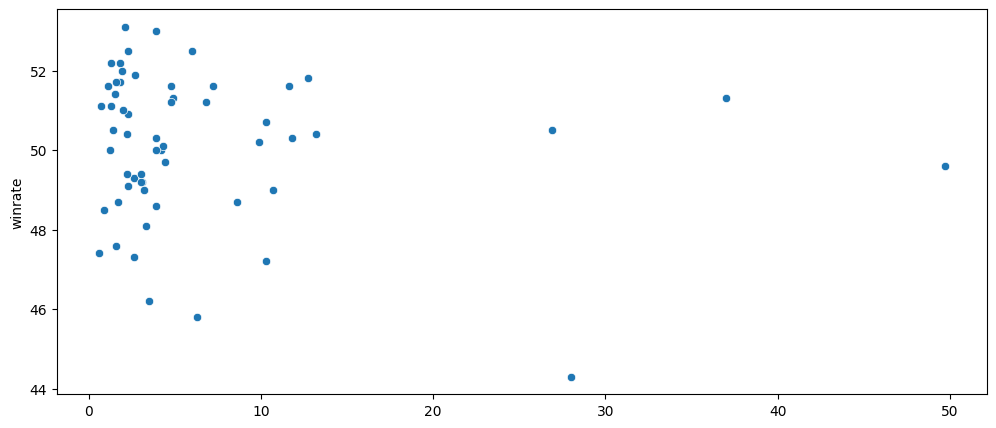

In [15]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = df["pickrate"]+df["banrate"], y = df["winrate"])

### Corrélation entre taux de sélection et taux de bannissement
Ici, on peut remarquer probablement une légère corrélation entre taux de sélection d'un personnage et taux de bannissement, les champions les plus utilisés auraient donc tendance à plus être bannis par les joueurs.

<AxesSubplot: xlabel='pickrate', ylabel='banrate'>

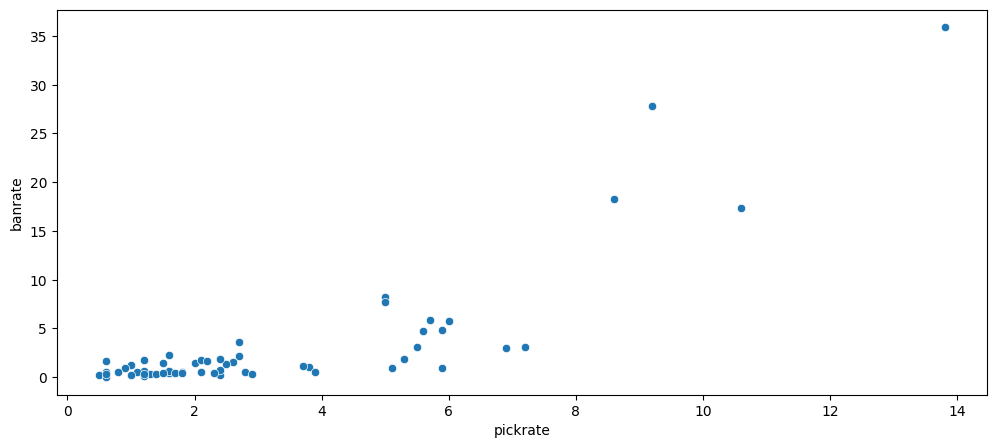

In [39]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df, x = df["pickrate"], y = df["banrate"])

## Potentielle corrélation entre le tier (puissance du champion) et sa popularité (pick + ban)
Voyons ensuite si le tier d'un perso (1 = plus fort, 5 = plus faible) provoque un effet sur sa popularité. On voit dans le graphe suivant que les personnages les plus forts sont en effet les plus populaires en général, ce qui a du sens pour un jeu compétitif.

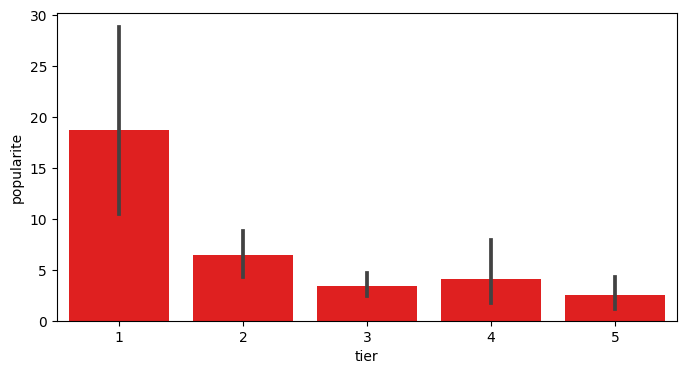

In [36]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = df.tier, y = df["banrate"]+ df["pickrate"], data=df2, color='red')
ax.set(xlabel='tier', ylabel='popularite')
plt.show()

### Corrélation entre tier et winrate
Ici, on voit une légère différence entre chaque tier, mais on remarque une différence assez nette de taux de victoire entre les personnages du tier 1 et ceux du tier 5. On en déduit que plus un personnage est fort, plus il a de chances de gagner, même si la différence est assez légère.

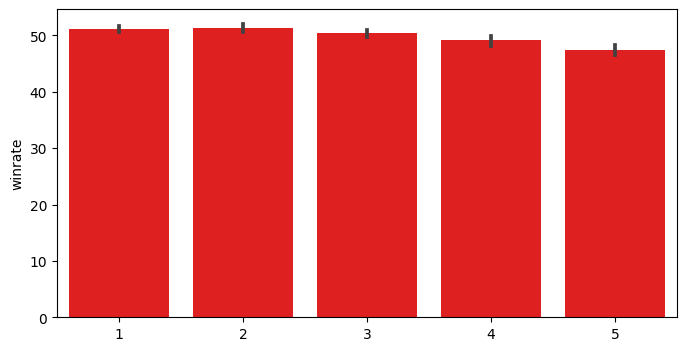

In [42]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = df.tier, y = df["winrate"], data=df2, color='red')
ax.set(xlabel='', ylabel='winrate')
plt.show()

### Heatmap
On retrouve ici les fortes corrélations entre pickrate et banrate, ainsi que la corrélation inverse entre tier et banrate, tier et pickrate ainsi que tier et winrate (étant donné que le tier est meilleur plus il est petit). On voit donc bien qu'un perso est plus populaire s'il est fort, et que plus il est populaire plus il aura tendance à être banni.

C:\Users\krisa\AppData\Local\Temp\ipykernel_21356\68407333.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data= df.corr(), annot=True)


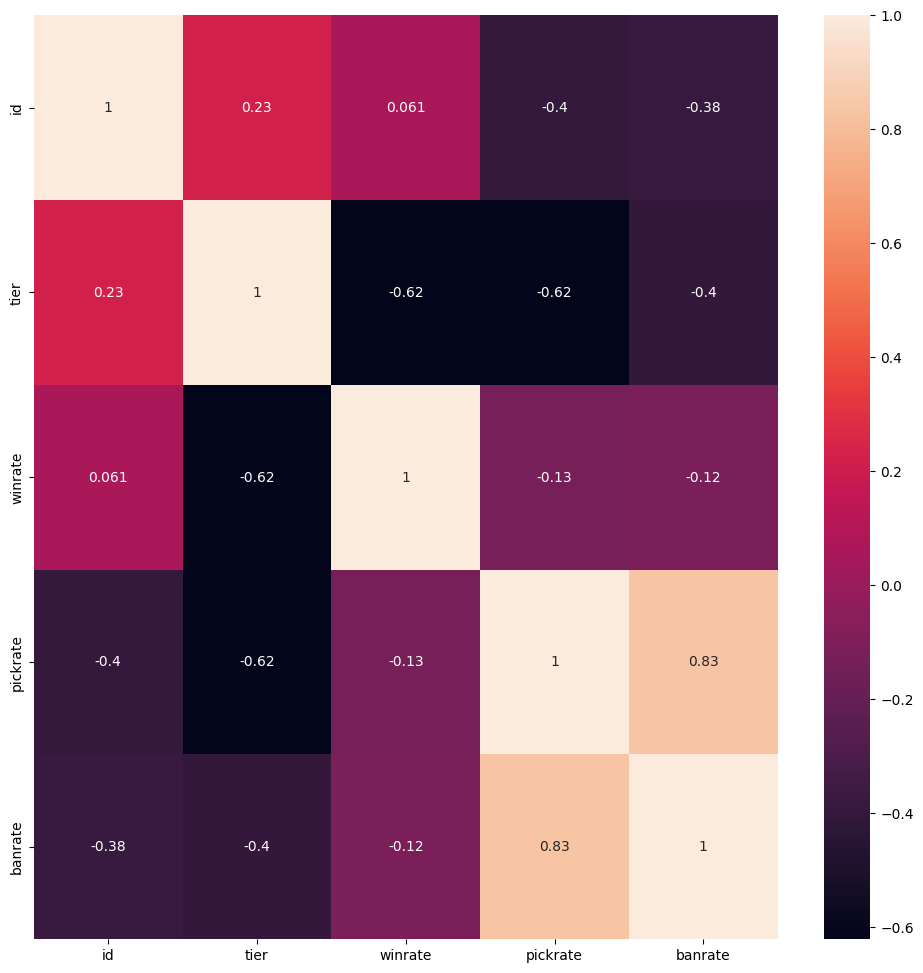

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(data= df.corr(), annot=True)
plt.show()